#EDA Assignment – Bike Details Dataset
Brief answers with code for each question

Question 1: Read dataset and display first 10 rows

In [5]:
import pandas as pd

df = pd.read_csv(r"/content/sample_data/BIKE DETAILS.csv")
df.head(10), df.shape, df.columns

(                                   name  selling_price  year seller_type  \
 0             Royal Enfield Classic 350         175000  2019  Individual   
 1                             Honda Dio          45000  2017  Individual   
 2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
 3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
 4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
 5                      Honda CB Twister          18000  2010  Individual   
 6                  Honda CB Hornet 160R          78500  2018  Individual   
 7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
 8                Hero Honda CBZ extreme          30000  2010  Individual   
 9                    Bajaj Discover 125          50000  2016  Individual   
 
        owner  km_driven  ex_showroom_price  
 0  1st owner        350                NaN  
 1  1st owner       5650                NaN  
 2  1st owner

Question 2: Missing values

In [6]:

df.isnull().sum()
# Approach: numerical -> median, categorical -> mode


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


Question 3: Selling price distribution

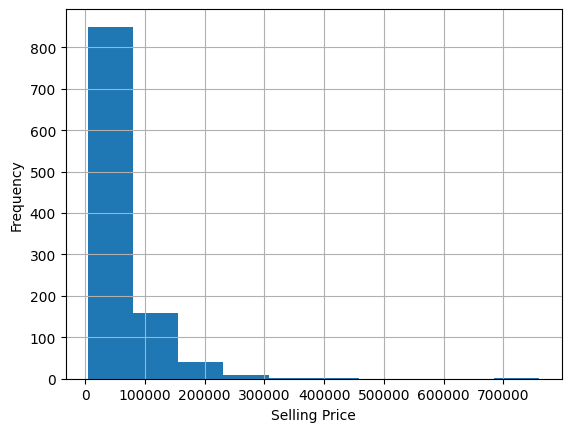

In [7]:
import matplotlib.pyplot as plt
df['selling_price'].hist()
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()


Question 4: Avg selling price by seller type

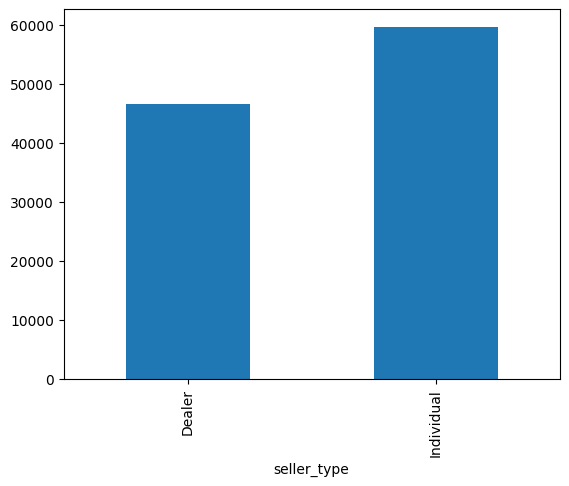

In [8]:

df.groupby('seller_type')['selling_price'].mean().plot(kind='bar')
plt.show()


Question 5: Avg km driven by owner

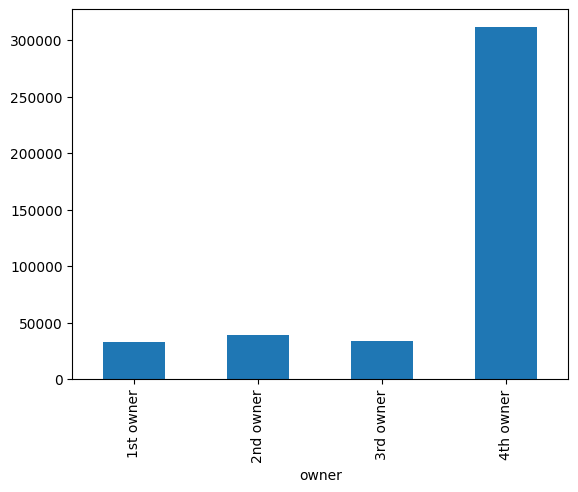

In [9]:

df.groupby('owner')['km_driven'].mean().plot(kind='bar')
plt.show()

Question 6: IQR outlier removal

In [10]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[(df['km_driven'] >= Q1 - 1.5*IQR) & (df['km_driven'] <= Q3 + 1.5*IQR)]
df['km_driven'].describe(), df_clean['km_driven'].describe()


(count      1061.000000
 mean      34359.833176
 std       51623.152702
 min         350.000000
 25%       13500.000000
 50%       25000.000000
 75%       43000.000000
 max      880000.000000
 Name: km_driven, dtype: float64,
 count     1022.000000
 mean     28203.415851
 std      19552.083583
 min        350.000000
 25%      13000.000000
 50%      24000.000000
 75%      40000.000000
 max      86000.000000
 Name: km_driven, dtype: float64)

Question 7: Year vs selling price

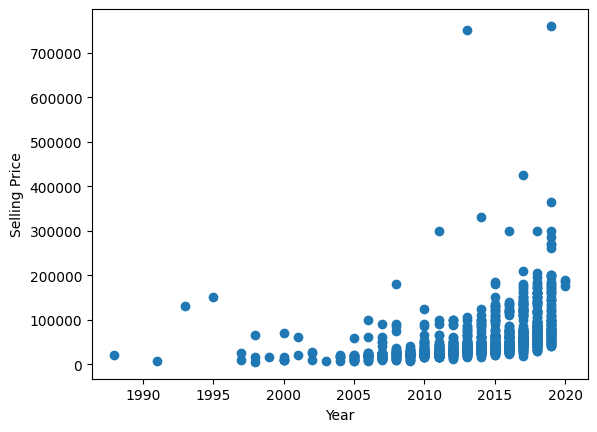

In [11]:

plt.scatter(df['year'], df['selling_price'])
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()


Question 8: One-hot encoding seller_type

In [12]:

df_encoded = pd.get_dummies(df, columns=['seller_type'])
df_encoded.head()


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


Question 9: Correlation heatmap

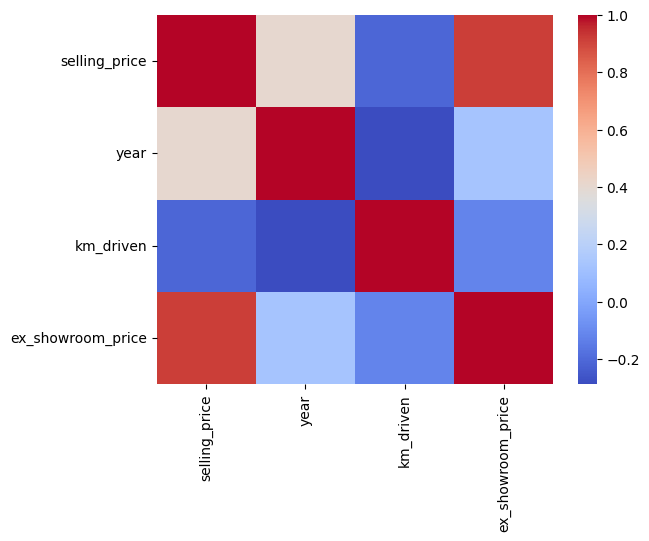

In [13]:

import seaborn as sns
import numpy as np

corr = df_encoded.select_dtypes(include=np.number).corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()
